<a href="https://colab.research.google.com/github/EvgeniBondarev/Neural-Networks/blob/main/%20lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [6]:
(x_trn, y_trn), (x_tst, y_tst) = keras.datasets.mnist.load_data()

print(x_trn.shape)
print(y_trn.shape)
print(x_tst.shape)
print(y_tst.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


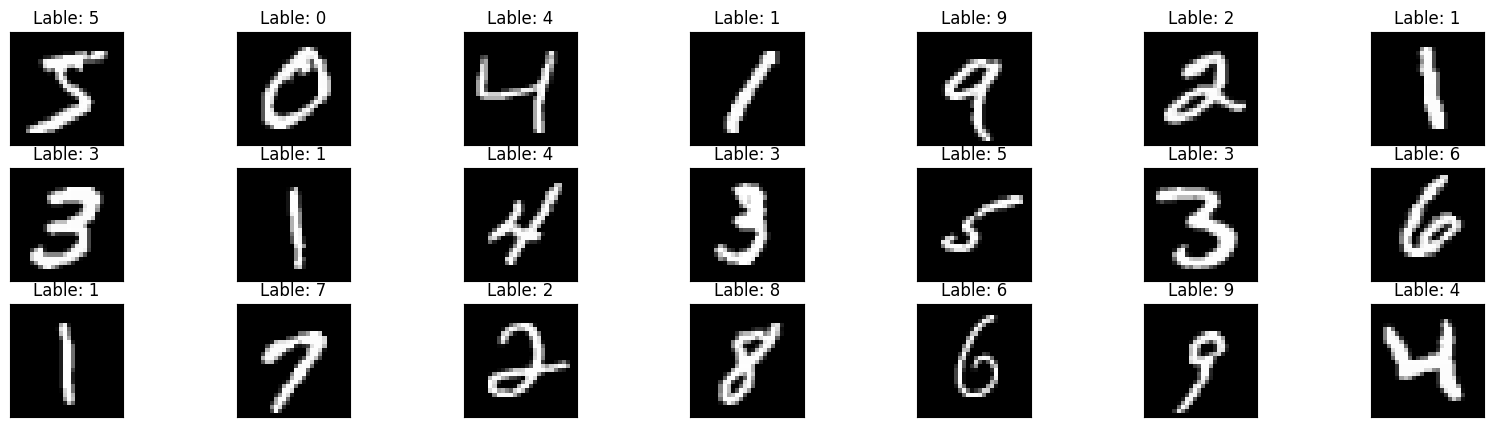

In [7]:
fig = plt.figure(figsize=(20, 5))
for i in np.arange(21):
    ax = fig.add_subplot(3, 7, i + 1, xticks=[], yticks=[])
    plt.imshow(x_trn[i], cmap="gray")
    ax.set_title(f"Lable: {y_trn[i]}")

In [8]:
num_classes = 10
img_size_x = 28
img_size_y = 28
num_features = img_size_x * img_size_y

n_hidden1 = 64
n_hidden2 = 64

learning_rate = 0.1

In [9]:
x_train = np.array(x_trn, np.float32) / 255.0
x_test = np.array(x_tst, np.float32) / 255.0

y_train = keras.utils.to_categorical(y_trn, num_classes)
y_test = keras.utils.to_categorical(y_tst, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
model = Sequential()
model.add(Flatten(input_shape=(img_size_x, img_size_y, 1)))
model.add(Dense(n_hidden1, activation='sigmoid'))
model.add(Dense(n_hidden2, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()#вывод модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#обучение
optimizer = keras.optimizers.SGD(lr=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),
                    validation_split=0.2, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2177 - accuracy: 0.2924 - val_loss: 2.0775 - val_accuracy: 0.4889
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8175 - accuracy: 0.5606 - val_loss: 1.4961 - val_accuracy: 0.6683
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2465 - accuracy: 0.7233 - val_loss: 1.0066 - val_accuracy: 0.7756
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8687 - accuracy: 0.7999 - val_loss: 0.7338 - val_accuracy: 0.8212
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6706 - accuracy: 0.8365 - val_loss: 0.5921 - val_accuracy: 0.8520
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5627 - accuracy: 0.8577 - val_loss: 0.5104 - val_accuracy: 0.8647
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4958 - accuracy: 0.8719 - val_loss: 0.4565 - val_accuracy:

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8983


[0.3712483048439026, 0.8982999920845032]

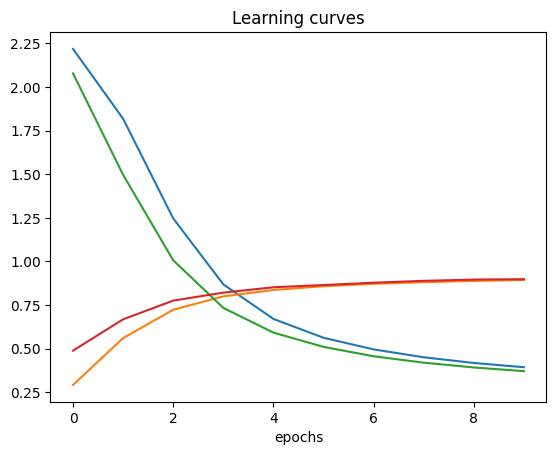

In [13]:
#график
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'trn_loss')
plt.plot(history.history['accuracy'], label = 'trn_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('epochs')
plt.show()